# Heart Failure Prediction

### About the data (Description of attributes)
- age: Age of the patient
- anaemia: Haemoglobin level of patient (Boolean)
- creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
- diabetes: If the patient has diabetes (Boolean)
- ejection_fraction: Percentage of blood leaving the heart at each contraction
- high_blood_pressure: If the patient has hypertension (Boolean)
- platelets: Platelet count of blood (kiloplatelets/mL)
- serum_creatinine: Level of serum creatinine in the blood (mg/dL)
- serum_sodium: Level of serum sodium in the blood (mEq/L)
- sex: Sex of the patient
- smoking: If the patient smokes or not (Boolean)
- time: Follow-up period (days)
- DEATH_EVENT: If the patient deceased during the follow-up period (Boolean)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import keras.layers
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras import callbacks
from keras.models import Sequential
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('heart_failure.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### Understanding the data set

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:>

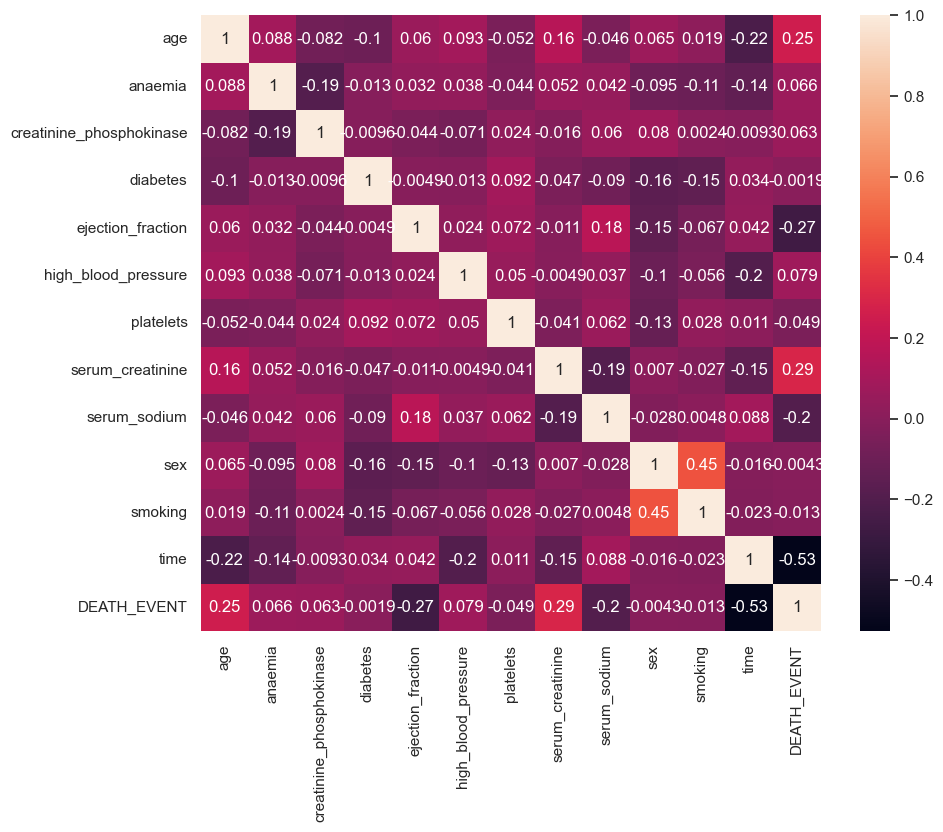

In [10]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data.corr(), annot=True)

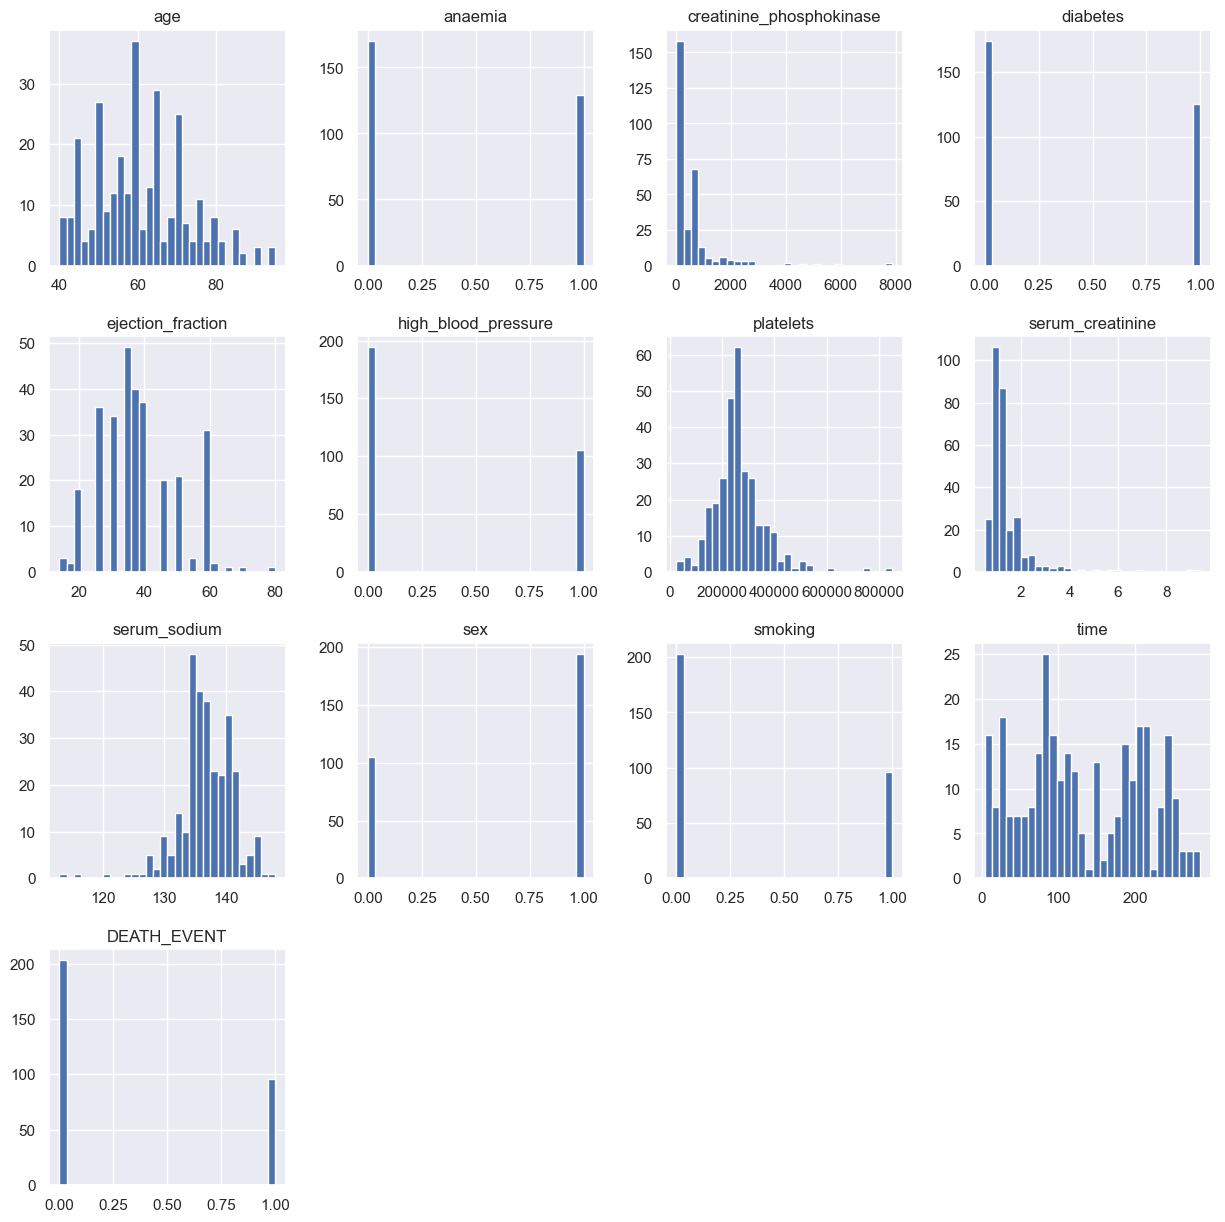

In [11]:
data.hist(bins=30, figsize=(15,15))
plt.show()

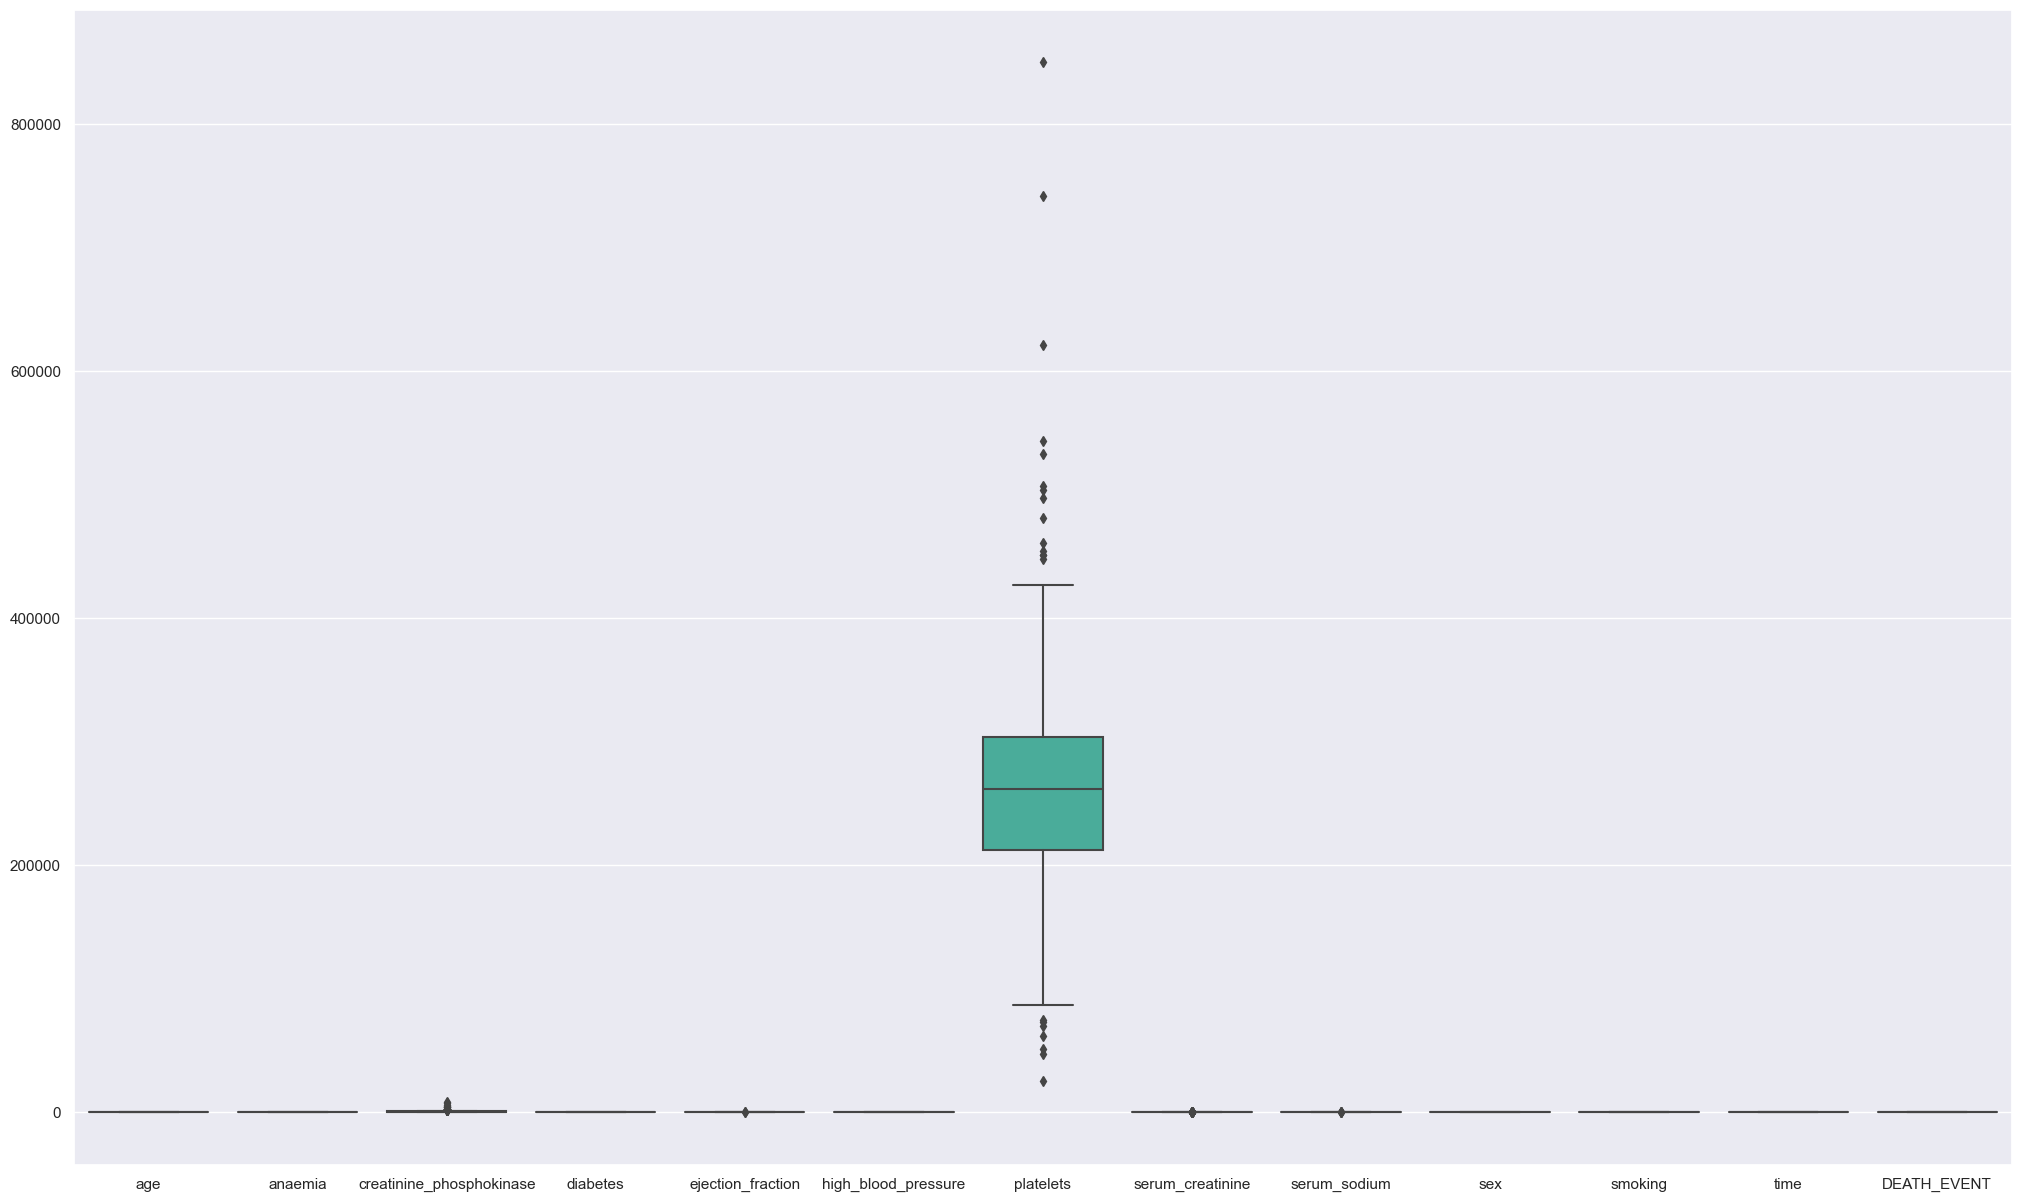

In [12]:
fig = plt.figure(figsize = (25,15))
sns.boxplot(data=data)
plt.show()

[Text(0, 0, '203'), Text(0, 0, '96')]

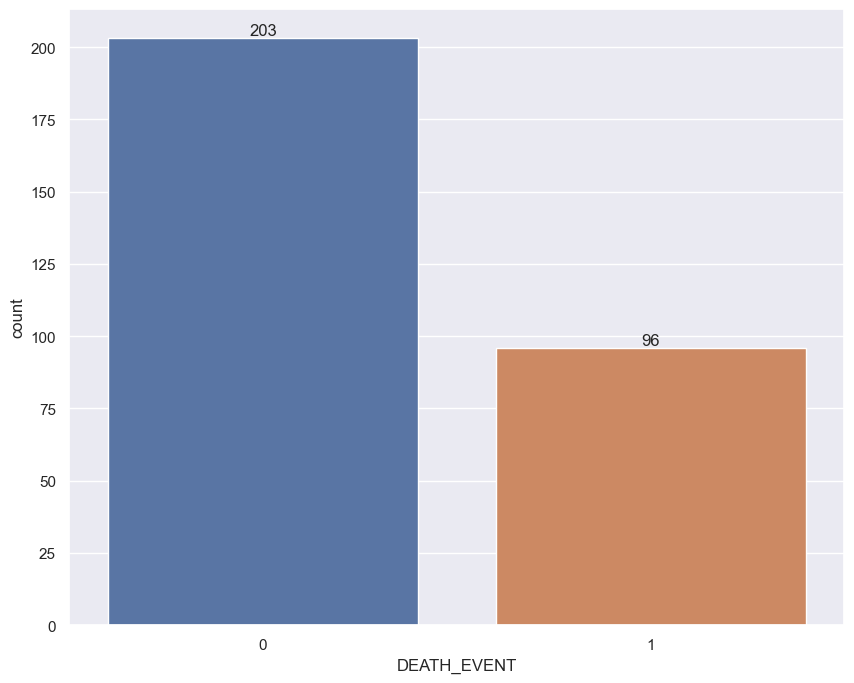

In [13]:
ax=sns.countplot(x = 'DEATH_EVENT' , data = data)
ax.bar_label(ax.containers[0])

## DATA PREPROCESSING

#### Independent variable/Dependent variable

In [14]:
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=12)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((209, 12), (209,), (90, 12), (90,))

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(299, 12) (209, 12) (90, 12)


In [17]:
scaler= StandardScaler()
scaler

StandardScaler()

In [18]:
X_train= scaler.fit_transform(X_train)
X_train

array([[ 1.73824986, -0.88674956, -0.53340214, ...,  0.77954622,
         1.40915375, -1.3628145 ],
       [ 0.33290944,  1.12771412, -0.54490505, ..., -1.28279758,
        -0.70964577, -0.29347097],
       [-0.24576014,  1.12771412, -0.54699649, ...,  0.77954622,
         1.40915375,  1.00030268],
       ...,
       [ 0.33290944, -0.88674956,  0.00200638, ...,  0.77954622,
         1.40915375,  1.09271509],
       [ 0.74624486, -0.88674956, -0.51457918, ..., -1.28279758,
        -0.70964577,  1.1323204 ],
       [-0.08042598,  1.12771412, -0.36504125, ...,  0.77954622,
        -0.70964577, -0.12184793]])

In [19]:
X_test= scaler.fit_transform(X_test)
X_test

array([[-1.63287511,  1.19684269, -0.50151758, ...,  0.63737744,
         1.56892908,  0.84039208],
       [ 1.27807272, -0.83553169, -0.00393474, ...,  0.63737744,
        -0.63737744, -0.31547152],
       [ 1.0134411 ,  1.19684269, -0.47744099, ...,  0.63737744,
         1.56892908, -0.83192121],
       ...,
       [ 0.21954623,  1.19684269,  1.18484686, ...,  0.63737744,
        -0.63737744,  0.65594576],
       [ 0.39596731,  1.19684269, -0.51957503, ...,  0.63737744,
        -0.63737744, -0.65977131],
       [ 0.66059894,  1.19684269, -0.00895069, ...,  0.63737744,
        -0.63737744, -1.10244247]])

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred=model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[52 10]
 [ 6 22]]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        62
           1       0.69      0.79      0.73        28

    accuracy                           0.82        90
   macro avg       0.79      0.81      0.80        90
weighted avg       0.83      0.82      0.83        90



## SVC

In [27]:
from sklearn import svm 

# Instantiating the SVM algorithm 
model1=svm.SVC()

# Fitting the model 
model1.fit (X_train, y_train)

# Predicting the test variables
y_pred_svm2 = model1.predict(X_test)

# Getting the score 
model1.score (X_test, y_test)

0.8222222222222222

In [28]:
print(classification_report(y_test, y_pred_svm2))


              precision    recall  f1-score   support

           0       0.86      0.89      0.87        62
           1       0.73      0.68      0.70        28

    accuracy                           0.82        90
   macro avg       0.80      0.78      0.79        90
weighted avg       0.82      0.82      0.82        90



### Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train)
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test,rf2.predict(X_test))))

Random Forest Accuracy: 0.856


Text(0.5, 1.0, 'Random Forest')

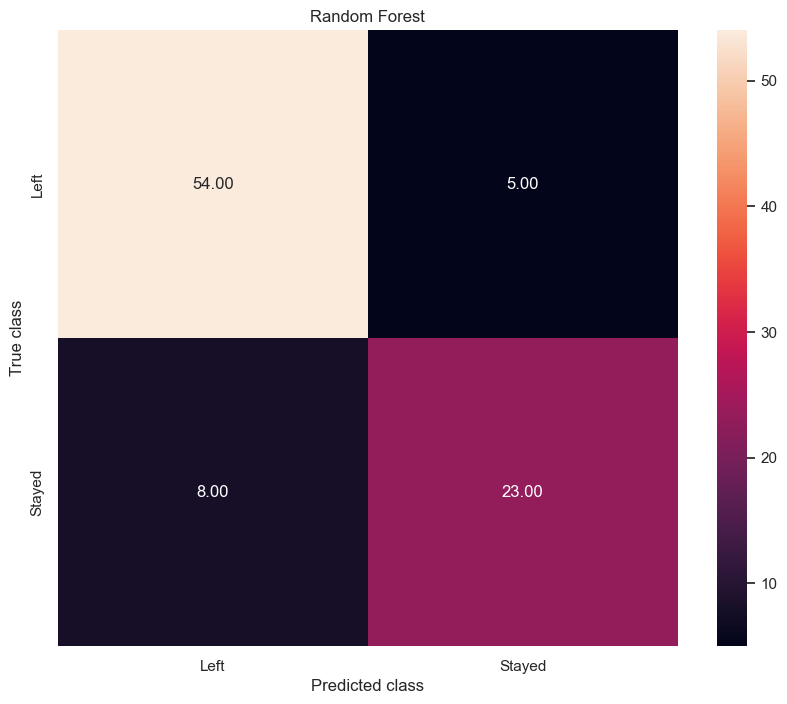

In [30]:
y_pred = rf2.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

## Navie Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [32]:
y_pred_nb2 = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8555555555555555


In [33]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_nb2)
conf_mat

array([[56,  6],
       [14, 14]], dtype=int64)

In [44]:

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
nbg_clf = GaussianNB()

In [45]:
for clf in (log_clf, nbg_clf, rnd_clf, svm_clf):
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8222222222222222
GaussianNB 0.7777777777777778
RandomForestClassifier 0.8555555555555555
SVC 0.8222222222222222


In [46]:
from sklearn.svm import SVC
svc_clf= SVC( probability =True,kernel='linear')


### AdaBoostClassifier with SVM

In [47]:
from sklearn.ensemble import  AdaBoostClassifier
boost = AdaBoostClassifier( base_estimator=svc_clf, n_estimators=500,algorithm='SAMME',learning_rate=.5)

boost.fit(X_train, y_train)

y_pred = boost.predict(X_test)

print("Bagging with Random Forest Classifier :Accuracy ", accuracy_score(y_test, y_pred))


Bagging with Random Forest Classifier :Accuracy  0.8444444444444444


In [48]:
## Training Score

boost.score(X_train,y_train)

0.8229665071770335

In [49]:
## Testing Score

boost.score(X_test,y_test)

0.8444444444444444

### AdaBoostClassifier with Decision Tree


In [51]:
from sklearn.tree import DecisionTreeClassifier
boost = AdaBoostClassifierr( base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=10,algorithm='SAMME',learning_rate=0.5)

boost.fit(X_train, y_train)

y_pred = boost.predict(X_test)

print("Bagging with Random Forest Classifier :Accuracy ", accuracy_score(y_test, y_pred))

Bagging with Random Forest Classifier :Accuracy  0.8777777777777778


In [52]:
## Training Score

boost.score(X_train,y_train)

0.8755980861244019

In [53]:
## Testing Score

boost.score(X_test,y_test)

0.8777777777777778

## HyperParameter Turning

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid={
   
    'learning_rate':[1,0.5,0.1,0.01,0.001,1.5,1.2],
    'algorithm':['SAMME','SAMME.R'],
    'n_estimators':[10,50,100,200]
    
}

In [66]:
grid= GridSearchCV(AdaBoostClassifier(),param_grid)
grid.fit(X_train,y_train)
y_pred_grid = grid.predict(X_test)

print("Bagging with Random Forest Classifier :Accuracy ", accuracy_score(y_test, y_pred_grid))

Bagging with Random Forest Classifier :Accuracy  0.8777777777777778


### Stratified K-fold Cross Validation

In [69]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

0.6388135593220339


### Leave One Out Cross Validation(LOOCV)

In [70]:
from sklearn.model_selection import LeaveOneOut
model=DecisionTreeClassifier()
leave_validation=LeaveOneOut()
results=cross_val_score(model,X,y,cv=leave_validation)

In [71]:
print(np.mean(results))

0.7692307692307693


## ANN

In [38]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 10, epochs = 120,callbacks=[early_stopping], validation_split=0.25)

Epoch 1/120
16/16 [==============================] - 2s 26ms/step - loss: 0.6922 - accuracy: 0.6410 - val_loss: 0.6905 - val_accuracy: 0.7170
Epoch 2/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6901 - accuracy: 0.6603 - val_loss: 0.6877 - val_accuracy: 0.7170
Epoch 3/120
16/16 [==============================] - 0s 7ms/step - loss: 0.6882 - accuracy: 0.6603 - val_loss: 0.6842 - val_accuracy: 0.7170
Epoch 4/120
16/16 [==============================] - 0s 7ms/step - loss: 0.6852 - accuracy: 0.6603 - val_loss: 0.6806 - val_accuracy: 0.7170
Epoch 5/120
16/16 [==============================] - 0s 6ms/step - loss: 0.6822 - accuracy: 0.6603 - val_loss: 0.6756 - val_accuracy: 0.7170
Epoch 6/120
16/16 [==============================] - 0s 7ms/step - loss: 0.6772 - accuracy: 0.6603 - val_loss: 0.6688 - val_accuracy: 0.7170
Epoch 7/120
16/16 [==============================] - 0s 7ms/step - loss: 0.6643 - accuracy: 0.6603 - val_loss: 0.6555 - val_accuracy: 0.7170
Epoch 8/120


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        62
           1       0.74      0.82      0.78        28

    accuracy                           0.86        90
   macro avg       0.83      0.85      0.84        90
weighted avg       0.86      0.86      0.86        90



# Result

After applying different type of ML and DL technique I come to result that the model model can be create using **'Random Forest Regressor'** as we can see that we are getting **87% accuracy** after handling imbalance data set.

We can also go with **AdaBoostClassifier with Decision Tree** beacause in this training and testing Accuracy is almost same, which is conisder a good point for a model and also accuracy is **87%** which is equal to Random Forest Regressor